In [1]:
# Importing libraries for the entire notebook
# Note: The code works as intended when all the cell are run in order, as some functions were reused betwen questions.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random

# Part I

## 1.1 Linear Regression

### Question 1: a), b) and c)

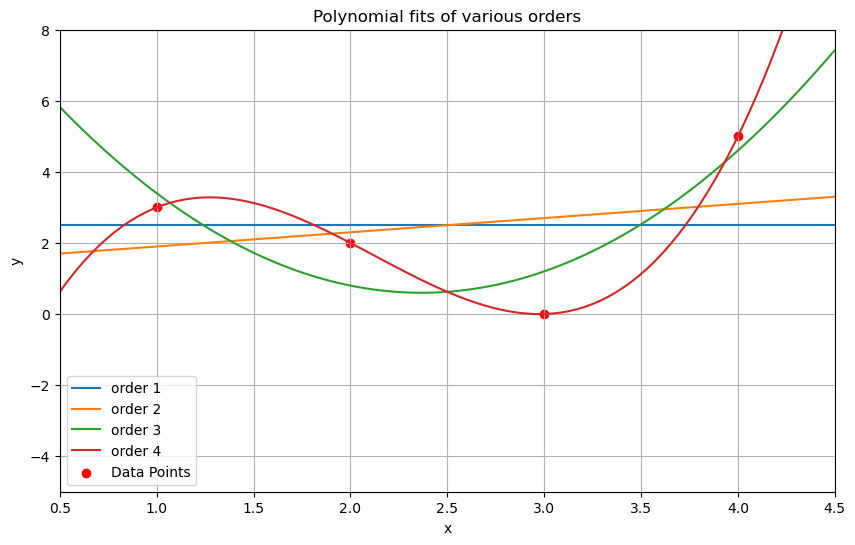

Polynomial order 1: y = 2.50x^0
MSE for order 1: 3.25e+00
Polynomial order 2: y = 1.50x^0 + 0.40x^1
MSE for order 2: 3.05e+00
Polynomial order 3: y = 9.00x^0 + -7.10x^1 + 1.50x^2
MSE for order 3: 8.00e-01
Polynomial order 4: y = -5.00x^0 + 15.17x^1 + -8.50x^2 + 1.33x^3
MSE for order 4: 5.82e-24


In [2]:
# We define the data given in the exercice 
x_data = np.array([1, 2, 3, 4])
y_data = np.array([3, 2, 0, 5])

# We initialise the list containing the orders of polynomial orders to fit
#   as well as two dictionaries to record the polynomial equations and the mean squred error values 
orders = [1, 2, 3, 4]
fitted_polynomials = []
mse_results = {}

def build_design_matrix(x, order):
    '''
    This function creates the polynomial design matrix
    
    INPUT: 
    x               : 1D array containing the x data points
    order           : Scalar representing the order of the polynomial we want

    OUTPUT:
    Design matrix   : 2D array where each row corresponds to a data point and each column corresponds to a polynomial basis term
    '''
    return np.column_stack([x**i for i in range(order)])

# Function to find polynomial coefficients by least squares
def least_squares_fit(design_matrix, y_values):
    '''
    This function aims to find the polynomial coefficients using the least squares method.

    INPUT: 
    design_matrix   : 2D array generted by the build_design_matrix function
    y_values        : 1D array of the target output values

    OUTPUT: 
    coefficients    : 1D array containing the calculated polynomial coefficients
    '''
    pseudo_inv = np.linalg.pinv(design_matrix.T @ design_matrix) @ design_matrix.T
    return pseudo_inv @ y_values

# With the functions defined, we can fit the polynomials and compute the MSE for each order
for order in orders:
    # We create the design matrix for this order
    design_matrix = build_design_matrix(x_data, order)
    
    # We call our function to compute polynomial coefficients
    coefficients = least_squares_fit(design_matrix, y_data)
    fitted_polynomials.append(coefficients)
    
    # We calculate the MSE for the fit
    y_estimate = design_matrix @ coefficients
    mse = np.mean((y_data - y_estimate) ** 2)
    mse_results[order] = mse

# We plot the polynomials
x_range = np.linspace(0.5, 4.5, 100)
plt.figure(figsize=(10, 6))

for index, order in enumerate(orders):
    plot_design_matrix = build_design_matrix(x_range, order)
    y_curve = plot_design_matrix @ fitted_polynomials[index]
    plt.plot(x_range, y_curve, label=f'order {order}')

# Scatter plot of original data points
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.xlim(0.5, 4.5)
plt.ylim(-5, 8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fits of various orders')
plt.legend()
plt.grid(True)
plt.show()

# We display the polynomial equations and MSE values
for order, coeffs in zip(orders, fitted_polynomials):
    equation_terms = " + ".join([f"{coef:.2f}x^{i}" for i, coef in enumerate(coeffs)])
    print(f"Polynomial order {order}: y = {equation_terms}")
    print(f"MSE for order {order}: {mse_results[order]:.2e}")

### Question 2: a) i)

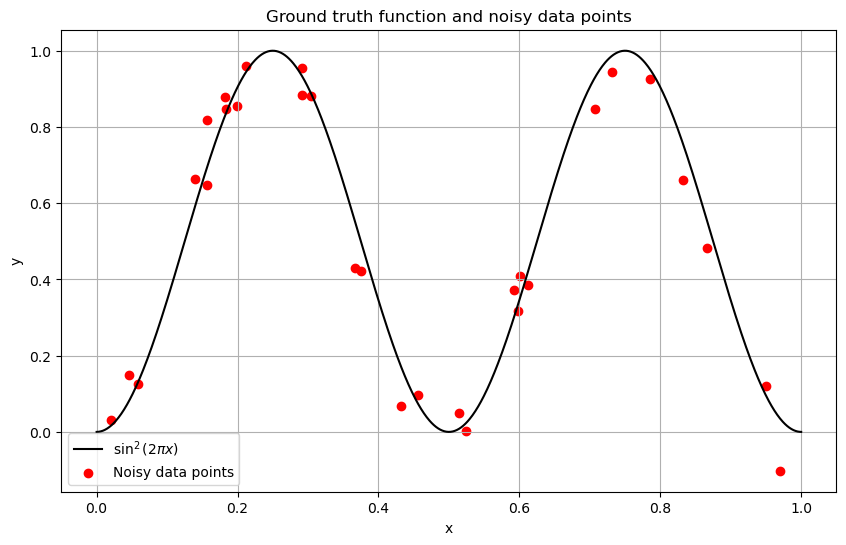

In [3]:
def calculate_noisy_y_values(x, sigma=0.07):
    '''
    This function returns the y values generated from the function sin^2(2πx) with added Gaussian noise

    INPUT : 
    x     : 1D array containing the x data points

    sigma : Scalar representing the standard deviation of the Gaussian noise 

    OUTPUT: 
    y     : 2D array of y values for the function sin^2(2πx) + noise 
    '''
    noise = np.random.normal(0, sigma, x.shape)
    y = np.sin(2 * np.pi * x) ** 2 + noise
    return y

# We generate the training data set and use a random number seed for reproducibility (42 is the convention)
np.random.seed(42)
num_train_points = 30
x_train = np.random.uniform(0, 1, num_train_points)
y_train = calculate_noisy_y_values(x_train)

# We plot the ground truth and teh generated data points
x_plot = np.linspace(0, 1, 1000)
y_true = np.sin(2 * np.pi * x_plot) ** 2

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_true, label=r'$\sin^2(2\pi x)$', color='black')
plt.scatter(x_train, y_train, color='red', label='Noisy data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ground truth function and noisy data points')
plt.legend()
plt.grid(True)
plt.show()

### Question 2: a) ii)

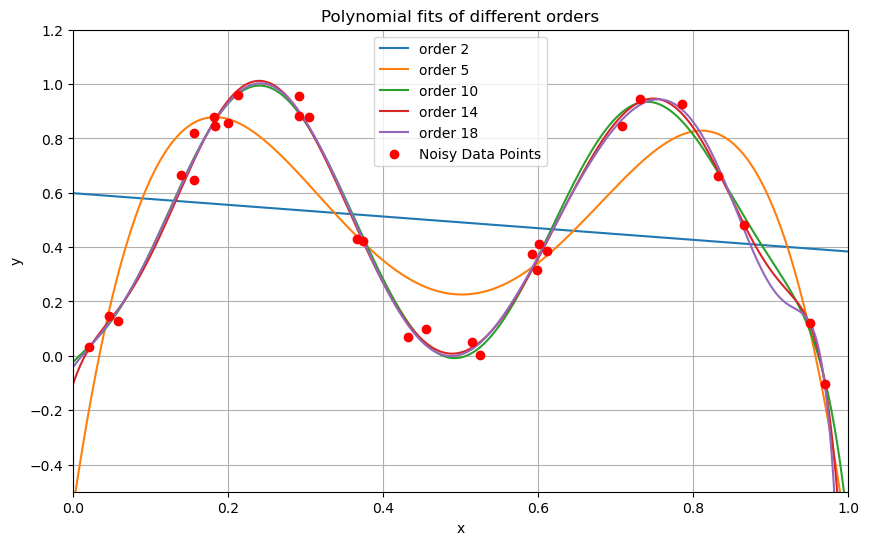

In [4]:
# We define the orders of the polynomials to be fitted
orders = [2, 5, 10, 14, 18]

# I've left the option to plot the true function as a sanity check
plt.figure(figsize=(10, 6))
#plt.plot(x_plot, y_true, label='sin^2(2pi x)', color='black')

# We fit and plot the polynomials for each order
for order in orders:
    design_matrix_train = build_design_matrix(x_train, order)
    
    # We compute the polynomial coefficients
    coefficients = least_squares_fit(design_matrix_train, y_train)
    
    # We use the coefficients to predict values for a smooth x range
    design_matrix_plot = build_design_matrix(x_plot, order)
    y_fit = design_matrix_plot @ coefficients 
    
    # We plot the fitted polynomial curve
    plt.plot(x_plot, y_fit, label=f'order {order}')

# We plot the noisy data points
plt.scatter(x_train, y_train, color='red', label='Noisy Data Points', zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fits of different orders')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(-0.5, 1.2)
plt.show()

### Question 2: b)

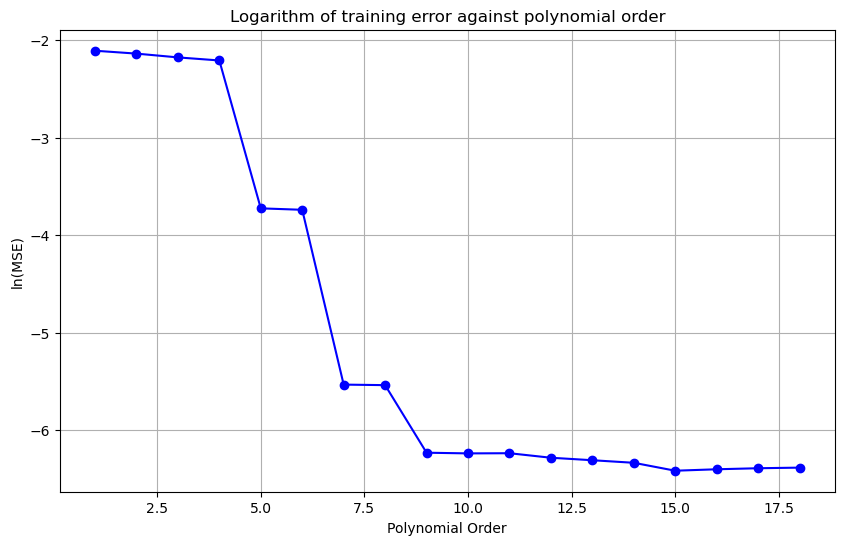

In [5]:
# We initialise a list to store the log(MSE)
log_train_errors = []
# We define the maximum polynomial degree to consider
max_order = 18  

for order in range(1, max_order+1):
    # We create the design matrix for the current polynomial order
    design_matrix = build_design_matrix(x_train, order)
    
    # We fit the polynomial and compute their coefficients
    coefficients = least_squares_fit(design_matrix, y_train)
    
    # We predict our y values on the training set
    y_train_pred = design_matrix @ coefficients
    
    # We compute the Mean Squared Error (MSE)
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    log_train_errors.append(np.log(mse_train))

# We create the plot for log(MSE) vs polynomial order
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), log_train_errors, marker='o', color='blue')
plt.xlabel('Polynomial Order')
plt.ylabel('ln(MSE)')
plt.title('Logarithm of training error against polynomial order')
plt.grid(True)
plt.show()

### Question 2: c)

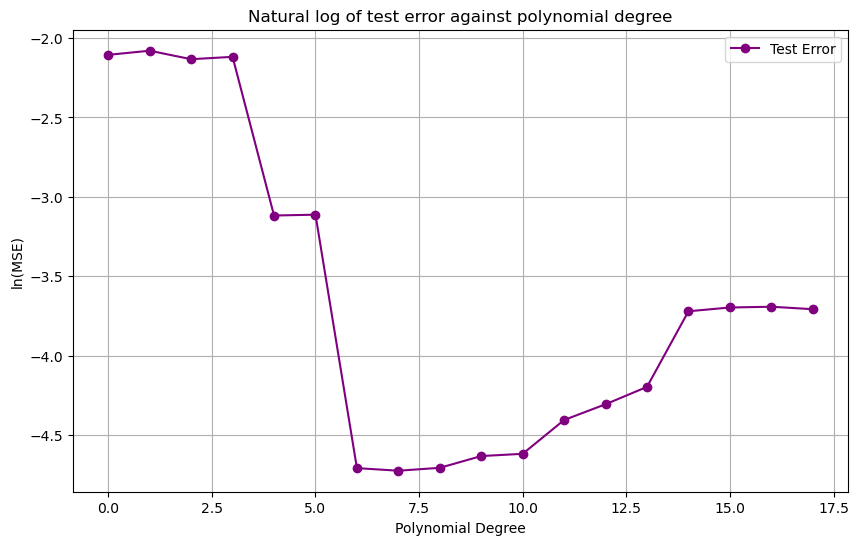

In [6]:
# As before, we set the seed to 42 for reproducibility
np.random.seed(42)

# We generate the test set
num_test_points = 1000
x_test_values = np.random.uniform(0, 1, num_test_points)
y_test_values = calculate_noisy_y_values(x_test_values, sigma=0.07)

# We initialise the list to store the log(MSE)
test_error_logs = []
max_order = 18  

for order in range(1, max_order+1):
    # The following steps are very simialr to before, so I won't describe what each do 
    train_design_matrix = build_design_matrix(x_train, order)
    polynomial_coefficients = least_squares_fit(train_design_matrix, y_train)
    test_design_matrix = build_design_matrix(x_test_values, order)
    y_test_predictions = test_design_matrix @ polynomial_coefficients
    test_mse = np.mean((y_test_values - y_test_predictions) ** 2)
    log_test_mse = np.log(test_mse)
    test_error_logs.append(log_test_mse)

# We plot the log of the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(0, max_order), test_error_logs, marker='o', color='purple', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('ln(MSE)')
plt.title('Natural log of test error against polynomial degree')
plt.grid(True)
plt.legend()
plt.show()

### Question 2: d)

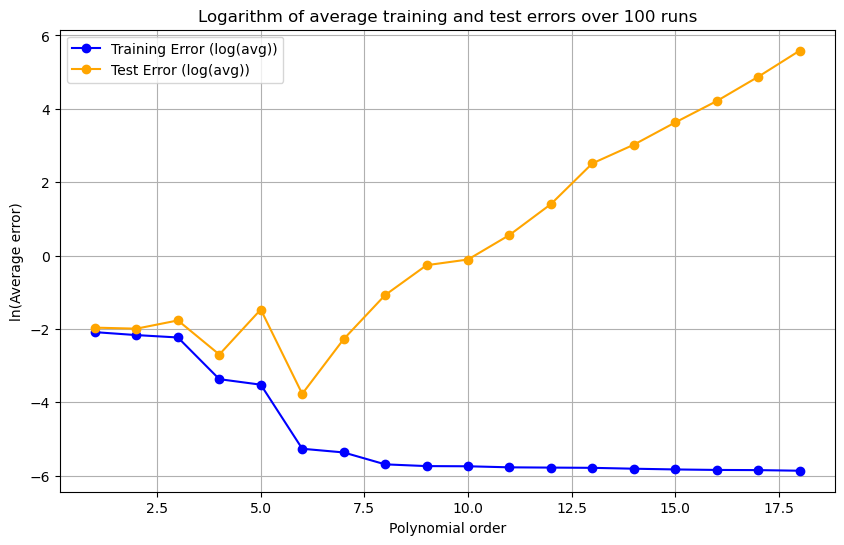

In [7]:
num_runs = 100
max_order = 18
num_train_points = 30
num_test_points = 1000

# We initialise arrays to store the errors (we use arrays this time so we can have all the runs in one place)
cumulative_train_errors = np.zeros(max_order)
cumulative_test_errors = np.zeros(max_order)

for run in range(num_runs):
    # We generate new training and test sets
    np.random.seed(run) 
    x_train = np.random.uniform(0, 1, num_train_points)
    y_train = calculate_noisy_y_values(x_train)
    x_test = np.random.uniform(0, 1, num_test_points)
    y_test = calculate_noisy_y_values(x_test)
    
    # We calculate the errors for each polynomial order
    for order in range(1, max_order + 1):
        train_design_matrix = build_design_matrix(x_train, order + 1)
        coefficients = least_squares_fit(train_design_matrix, y_train)
        
        # We calculate training error
        train_predictions = train_design_matrix @ coefficients
        train_mse = np.mean((y_train - train_predictions) ** 2)
        cumulative_train_errors[order - 1] += train_mse  
        
        # We calculate test error
        test_design_matrix = build_design_matrix(x_test, order + 1)
        test_predictions = test_design_matrix @ coefficients
        test_mse = np.mean((y_test - test_predictions) ** 2)
        cumulative_test_errors[order - 1] += test_mse 

# We compute the average errors and take their logarithms
avg_train_errors = cumulative_train_errors / num_runs
avg_test_errors = cumulative_test_errors / num_runs

log_avg_train_errors = np.log(avg_train_errors)
log_avg_test_errors = np.log(avg_test_errors)

# We plot our results 
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), log_avg_train_errors, marker='o', label='Training Error (log(avg))', color='blue')
plt.plot(range(1, max_order + 1), log_avg_test_errors, marker='o', label='Test Error (log(avg))', color='orange')
plt.xlabel('Polynomial order')
plt.ylabel('ln(Average error)')
plt.title('Logarithm of average training and test errors over 100 runs')
plt.legend()
plt.grid(True)
plt.show()


### Question 3:

In [8]:
def sine_basis_design_matrix(x, k):
    """
    This function creates a design matrix for the sine basis functions up to order k
    
    INPUT:
    x         : 1D array of input values
    k         : Scalar, maximum number of sine terms
    OUTPUT:
    Design matrix: 2D array where each row corresponds to a data point and each column corresponds to a sine basis term
    """
    return np.column_stack([np.sin((i + 1) * np.pi * x) for i in range(k)])

def calculate_noisy_y_values(x, sigma=0.07):
    '''
    This function returns the y values generated from the function sin^2(2πx) with added Gaussian noise

    INPUT : 
    x     : 1D array containing the x data points

    sigma : Scalar representing the standard deviation of the Gaussian noise 

    OUTPUT: 
    y     : 2D array of y values for the function sin^2(2πx) + noise 
    '''
    noise = np.random.normal(0, sigma, x.shape)
    y = np.sin(2 * np.pi * x) ** 2 + noise
    return y

# Define the least squares fit function
def least_squares_fit(design_matrix, y_values):
    '''
    This function aims to find the polynomial coefficients using the least squares method.

    INPUT: 
    design_matrix   : 2D array generted by the build_design_matrix function
    y_values        : 1D array of the target output values

    OUTPUT: 
    coefficients    : 1D array containing the calculated polynomial coefficients
    '''
    pseudo_inv = np.linalg.pinv(design_matrix.T @ design_matrix) @ design_matrix.T
    return pseudo_inv @ y_values

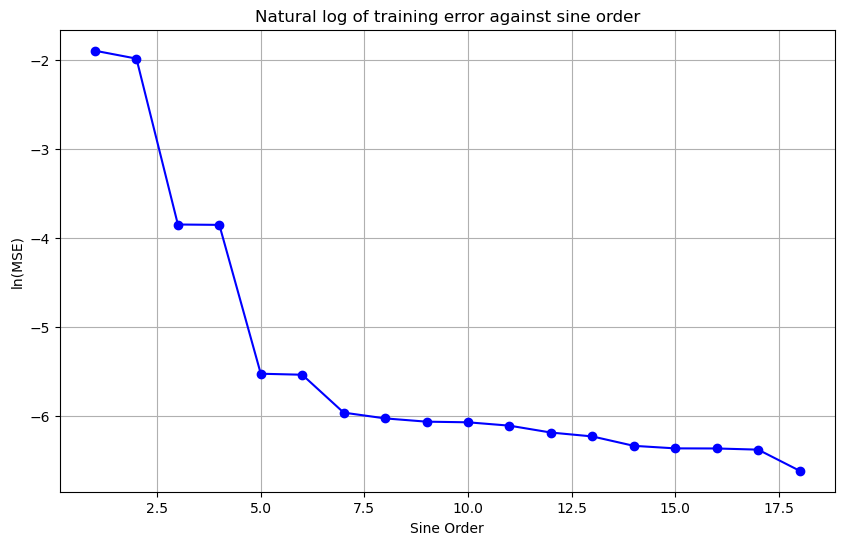

In [9]:
### TRAINING ERROR AGAINST SINE BASIS ORDER ###

# We initialise a list to store the log(MSE)
log_train_errors = []

# We define the orders of k we want to work with 
orders = list(range(1, 19))  

# We generate the training data
np.random.seed(42)
x_train = np.random.uniform(0, 1, 30)
y_train = calculate_noisy_y_values(x_train)

# We loop through each order of k
for i, order in enumerate(orders):
    design_matrix = sine_basis_design_matrix(x_train, order)
    coefficients = least_squares_fit(design_matrix, y_train)
    y_train_pred = design_matrix @ coefficients
    
    # We compute the mean squared error
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    log_train_errors.append(np.log(mse_train))

# We create th plot for log(MSE) vs sine order
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), log_train_errors, marker='o', color='blue')
plt.xlabel('Sine Order')
plt.ylabel('ln(MSE)')
plt.title('Natural log of training error against sine order')
plt.grid(True)
plt.show()

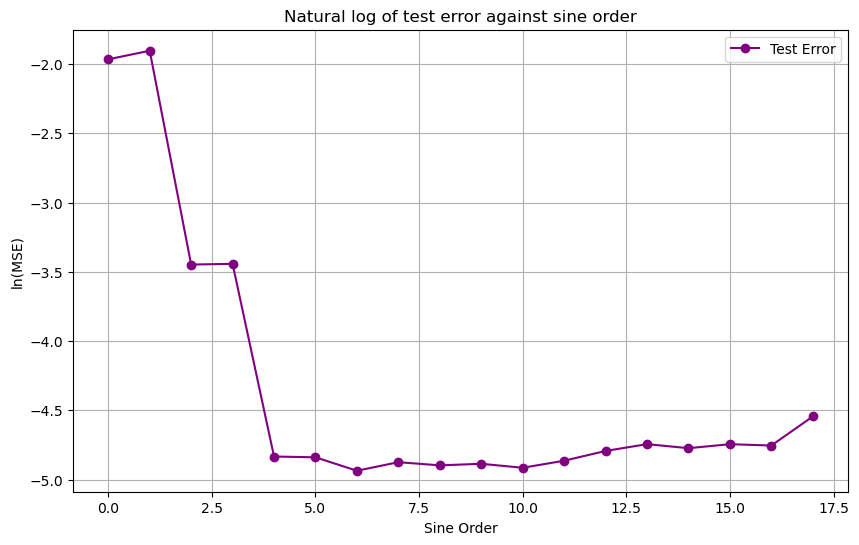

In [10]:
### TEST ERROR AGAINST SINE BASIS ORDER ###

# We define the orders of k we want to work with 
orders = list(range(1, 19))  

# We initialise the list to store the log(MSE)
test_error_logs = []

# We generate the test set
np.random.seed(42)
num_test_points = 1000
x_test_values = np.random.uniform(0, 1, num_test_points)
y_test_values = calculate_noisy_y_values(x_test_values, sigma=0.07)

for order in orders:
    train_design_matrix = sine_basis_design_matrix(x_train, order)
    sine_coefficients = least_squares_fit(train_design_matrix, y_train)
    test_design_matrix = sine_basis_design_matrix(x_test_values, order)
    y_test_predictions = test_design_matrix @ sine_coefficients
    test_mse = np.mean((y_test_values - y_test_predictions) ** 2)
    log_test_mse = np.log(test_mse)
    test_error_logs.append(log_test_mse)

# We plot the log of the test errors
plt.figure(figsize=(10, 6))
plt.plot(range(0, max_order), test_error_logs, marker='o', color='purple', label='Test Error')
plt.xlabel('Sine Order')
plt.ylabel('ln(MSE)')
plt.title('Natural log of test error against sine order')
plt.grid(True)
plt.legend()
plt.show()

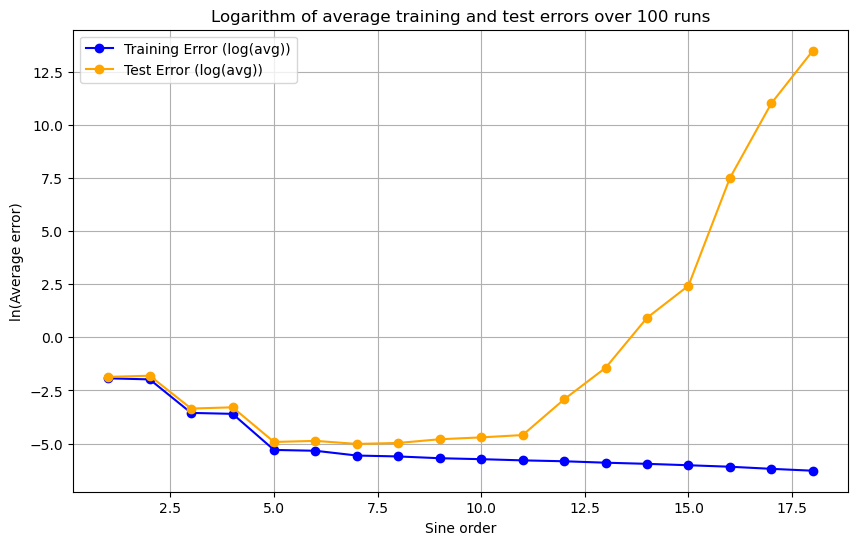

In [11]:
### TRAINING AND TEST ERROR AVERAGE OVER 100 RUNS ###

num_runs = 100
max_order = 18
num_train_points = 30
num_test_points = 1000
sigma = 0.07

# We initialise arrays to store the errors (we use arrays this time so we can have all the runs in one place)
cumulative_train_errors = np.zeros(max_order)
cumulative_test_errors = np.zeros(max_order)

for run in range(num_runs):
    # We generate new training and test sets
    np.random.seed(run) 
    x_train = np.random.uniform(0, 1, num_train_points)
    y_train = calculate_noisy_y_values(x_train, sigma)
    x_test = np.random.uniform(0, 1, num_test_points)
    y_test = calculate_noisy_y_values(x_test, sigma)
    
    # We calculate the errors for each sine order
    for order in range(1, max_order + 1):
        train_design_matrix = sine_basis_design_matrix(x_train, order)
        coefficients = least_squares_fit(train_design_matrix, y_train)
        
        # We calculate training error
        train_predictions = train_design_matrix @ coefficients
        train_mse = np.mean((y_train - train_predictions) ** 2)
        cumulative_train_errors[order - 1] += train_mse  
        
        # We calculate test error
        test_design_matrix = sine_basis_design_matrix(x_test, order)
        test_predictions = test_design_matrix @ coefficients
        test_mse = np.mean((y_test - test_predictions) ** 2)
        cumulative_test_errors[order - 1] += test_mse 

# We compute the average errors and take their logarithms
avg_train_errors = cumulative_train_errors / num_runs
avg_test_errors = cumulative_test_errors / num_runs

log_avg_train_errors = np.log(avg_train_errors)
log_avg_test_errors = np.log(avg_test_errors)

# We plot our results 
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_order + 1), log_avg_train_errors, marker='o', label='Training Error (log(avg))', color='blue')
plt.plot(range(1, max_order + 1), log_avg_test_errors, marker='o', label='Test Error (log(avg))', color='orange')
plt.xlabel('Sine order')
plt.ylabel('ln(Average error)')
plt.title('Logarithm of average training and test errors over 100 runs')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Filtered Boston housing and kernels

### Question 4: a), c) and d)

In [12]:
class BostonHousingModel:
    def __init__(self, filepath, target_column='MEDV', test_fraction=1/3, runs=20):
        """
        This function initialises the class with the boston_filtered.csv data set and other key parameters
        
        INPUT: 
        filepath        : Path to the .csv dataset file (boston_filtered.csv)
        target_column   : Name of the variable column to predict (MEDV, set by default)
        test_fraction   : Proportion of the dataset to include in the test split
        runs            : Number of iterations for training and testing (default is 20)
        """
        self.data = pd.read_csv(filepath)
        self.target = target_column
        self.test_frac = test_fraction
        self.num_runs = runs
        self.features = self.data.columns.drop(self.target)
        self.results = {
            'naive': {'train_mse': [], 'test_mse': []},
            'single_attr': {feature: {'train_mse': [], 'test_mse': []} for feature in self.features},
            'all_attrs': {'train_mse': [], 'test_mse': []}
        }

    def custom_std(self, values):
        """
        This function returns the standard deviation of a list of values
        
        INPUT: 
        values: Numpy array of numerical values 
        """
        # We compute the mean of the input values
        mean = np.mean(values)
        # We calculate the variance by averaging the squared differences from the mean
        variance = np.mean((values - mean) ** 2)
        # We return the square root of the variance as the standard deviation
        return np.sqrt(variance)
    
    def shuffle_split(self):
        """
        This function randomly shuffles the data and splits it into training and testing sets
        """
        # We shuffle the data first to make sure each split is different 
        shuffled = self.data.sample(frac=1).reset_index(drop=True)
        # We find the index at which to split the data into train and test
        split_idx = int((1 - self.test_frac) * len(shuffled))
        # We create the train and test data sets using slicing
        train = shuffled.iloc[:split_idx]
        test = shuffled.iloc[split_idx:]
        return train, test

    def mean_prediction(self, y_train):
        """
        This function computes the mean of the target variable from the training set

        INPUT: 
        y_train     : Numpy array containing the training taget values 
        """
        return np.mean(y_train)
    
    def train_naive(self, train_set, test_set):
        """
        This function gives the answer to question 4a: it trains a naive model predicting the mean of the training target

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        """
        # We extract the values from the both the training and test sets
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        # We calculate the mean by calling the mean_prediction function defined above
        mean = self.mean_prediction(y_train)

        # We create prediction arrays filled with the mean values for the training and test sets respectively
        train_pred = np.full_like(y_train, mean)
        test_pred = np.full_like(y_test, mean)
        
        # We calculate the MSE for training and test predictions
        train_mse = self.calculate_mse(y_train, train_pred)
        test_mse = self.calculate_mse(y_test, test_pred)
        
        # We store our results 
        self.results['naive']['train_mse'].append(train_mse)
        self.results['naive']['test_mse'].append(test_mse)
    
    def train_single_attribute(self, train_set, test_set, feature):
        """
        This function gives the answer to question 4c: it trains a linear regression model using a single feature.

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        feature     : Corresponds to an attribute of the data set (we will loop over all the features and call this function for each)
        """
        # We extract the single feature from the training and test sets as input
        X_train = train_set[[feature]].values
        X_test = test_set[[feature]].values

        # We extract the target variable from the training and test sets 
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        
        # We add the bias term to the training and test for the intercept
        X_train_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
        X_test_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
        
        # We compute weights using the Least Squares method with pseudo-inverse
        weights = np.linalg.pinv(X_train_b).dot(y_train)
        
        # We maje our predictions,
        y_pred_train = X_train_b.dot(weights)
        y_pred_test = X_test_b.dot(weights)
        
        # calculate the MSE,
        train_mse = self.calculate_mse(y_train, y_pred_train)
        test_mse = self.calculate_mse(y_test, y_pred_test)
        
        # and save our results
        self.results['single_attr'][feature]['train_mse'].append(train_mse)
        self.results['single_attr'][feature]['test_mse'].append(test_mse)
    
    def train_all_attributes(self, train_set, test_set):
        """
        This function gives the answer to question 4d: it trains a linear regression model using all available features

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        """
        # We extract all the features from the training and test sets as input
        X_train = train_set[self.features].values
        X_test = test_set[self.features].values

        # We extract the target variable from the training and test sets 
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        
        # Add bias term to the training and test data sets
        X_train_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
        X_test_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
        
        # We compute weights using the Least Squares method with pseudo-inverse
        weights = np.linalg.pinv(X_train_b).dot(y_train)
        
        # We maje our predictions,
        y_pred_train = X_train_b.dot(weights)
        y_pred_test = X_test_b.dot(weights)
        
        # calculate the MSE,
        train_mse = self.calculate_mse(y_train, y_pred_train)
        test_mse = self.calculate_mse(y_test, y_pred_test)
        
        # and save our results
        self.results['all_attrs']['train_mse'].append(train_mse)
        self.results['all_attrs']['test_mse'].append(test_mse)
    
    def calculate_mse(self, actual, predicted):
        """
        This function calculates the Mean Squared Error (MSE) between actual and predicted values

        INPUT: 
        actual      : Numpy array of true target values 
        predicted   : Numpy array of values predicted by the model
        """
        return np.mean((predicted - actual) ** 2)
    
    def evaluate_models(self):
        """
        This function runs the training and evaluation of each model
        """
        # We evaluate the model for the number of runs
        for run in range(self.num_runs):
            train_set, test_set = self.shuffle_split()
            
            # We evaluate the naive model 
            self.train_naive(train_set, test_set)
            
            # We evaluate the single attribute models
            for feature in self.features:
                self.train_single_attribute(train_set, test_set, feature)
            
            # We evaluate the all attributes model
            self.train_all_attributes(train_set, test_set)
    
    def summarize_results(self):
        """
        This function computes and defines a format to print the average MSE and standard deviations for all the models
        """
        print("=== Naive Regression ===")
        # We calculate the average MSE for training and testing sets
        naive_train_avg = np.mean(self.results['naive']['train_mse'])
        naive_test_avg = np.mean(self.results['naive']['test_mse'])

        # We calculate standard deviation of MSE for training and testing sets
        naive_train_std = self.custom_std(np.array(self.results['naive']['train_mse']))
        naive_test_std = self.custom_std(np.array(self.results['naive']['test_mse']))

        print(f"Average Training MSE: {naive_train_avg:.4f} ± {naive_train_std:.4f}")
        print(f"Average Test MSE: {naive_test_avg:.4f} ± {naive_test_std:.4f}\n")
        
        print("=== Single Attribute Regressions ===")
        # We loop over all the features
        for feature in self.features:
            # We calculate the average MSE for the training and testing sets
            train_avg = np.mean(self.results['single_attr'][feature]['train_mse'])
            test_avg = np.mean(self.results['single_attr'][feature]['test_mse'])
            # We calculate the standard deviation of the error for training and testing sets
            train_std = self.custom_std(np.array(self.results['single_attr'][feature]['train_mse']))
            test_std = self.custom_std(np.array(self.results['single_attr'][feature]['test_mse']))
            print(f"Feature: {feature}")
            print(f"  Training MSE: {train_avg:.4f} ± {train_std:.4f}")
            print(f"  Test MSE: {test_avg:.4f} ± {test_std:.4f}\n")
        
        print("=== All Attributes Regression ===")
        # We calculate the average MSE for the training and testing sets
        all_train_avg = np.mean(self.results['all_attrs']['train_mse'])
        all_test_avg = np.mean(self.results['all_attrs']['test_mse'])
        # We calculate the standard deviation of the error
        all_train_std = self.custom_std(np.array(self.results['all_attrs']['train_mse']))
        all_test_std = self.custom_std(np.array(self.results['all_attrs']['test_mse']))
        print(f"Average Training MSE: {all_train_avg:.4f} ± {all_train_std:.4f}")
        print(f"Average Test MSE: {all_test_avg:.4f} ± {all_test_std:.4f}\n")
    
    def detailed_single_attribute_analysis(self):
        """
        This function gives the average training and test MSE as well as the average training and test standard deviation for each single attribute regression
        """
        print("=== Detailed Single Attribute Analysis ===")
        for feature in self.features:
            train_mses = self.results['single_attr'][feature]['train_mse']
            test_mses = self.results['single_attr'][feature]['test_mse']
            avg_train_mse = np.mean(train_mses)
            avg_test_mse = np.mean(test_mses)
            std_train = self.custom_std(np.array(train_mses))
            std_test = self.custom_std(np.array(test_mses))
            print(f"Feature: {feature}")
            print(f"  Average Training MSE: {avg_train_mse:.4f}")
            print(f"  Average Test MSE: {avg_test_mse:.4f}")
            print(f"  Training MSE STD: {std_train:.4f}")
            print(f"  Test MSE STD: {std_test:.4f}\n")

In [13]:
# We train, evaluate and display the results for each model
if __name__ == "__main__":
    model = BostonHousingModel(filepath='boston_filtered.csv', target_column='MEDV', test_fraction=1/3, runs=20)
    model.evaluate_models()
    model.summarize_results()
    model.detailed_single_attribute_analysis()

=== Naive Regression ===
Average Training MSE: 83.4062 ± 3.5878
Average Test MSE: 86.7254 ± 7.2282

=== Single Attribute Regressions ===
Feature: CRIM
  Training MSE: 70.8739 ± 3.2060
  Test MSE: 74.0706 ± 6.5122

Feature: ZN
  Training MSE: 72.4775 ± 3.7925
  Test MSE: 75.8473 ± 7.6186

Feature: INDUS
  Training MSE: 63.5788 ± 3.6801
  Test MSE: 67.3057 ± 7.4810

Feature: CHAS
  Training MSE: 81.3323 ± 3.6556
  Test MSE: 83.6017 ± 7.5402

Feature: NOX
  Training MSE: 67.7105 ± 3.6276
  Test MSE: 71.9494 ± 7.3677

Feature: RM
  Training MSE: 43.7150 ± 3.4237
  Test MSE: 43.6715 ± 6.8463

Feature: AGE
  Training MSE: 70.9769 ± 3.8339
  Test MSE: 75.8011 ± 7.7557

Feature: DIS
  Training MSE: 77.9363 ± 3.9469
  Test MSE: 82.0467 ± 7.9962

Feature: RAD
  Training MSE: 71.4678 ± 3.7423
  Test MSE: 73.8613 ± 7.6423

Feature: TAX
  Training MSE: 65.0696 ± 3.6075
  Test MSE: 67.9269 ± 7.3778

Feature: PTRATIO
  Training MSE: 62.9703 ± 3.3148
  Test MSE: 62.4538 ± 6.6573

Feature: LSTAT
  Trai

## 1.3 Kernelised ridge regression

### Question 5: a), b), c) and d)

In [14]:
class BostonHousingAnalysis:
    def __init__(self, filepath, target_column='MEDV', test_fraction=1/3, runs=20, K=5):
        """
        This function initialises the class with the boston_filtered.csv data set and other key parameters
        
        INPUT: 
        filepath        : Path to the .csv dataset file (boston_filtered.csv)
        target_column   : Name of the variable column to predict (MEDV, set by default)
        test_fraction   : Proportion of the dataset to include in the test split
        runs            : Number of iterations for training and testing (default is 20)
        K               : Number of folds for K-Fold Cross-Validation (set to 5)
        """
        self.filepath = filepath
        self.target = target_column
        self.test_frac = test_fraction
        self.num_runs = runs
        self.K = K
        self.data = self.load_data()
        self.features = self.data.columns.drop(self.target)
        self.results = {
            'naive': {'train_mse': [], 'test_mse': []},
            'linear_single': {feature: {'train_mse': [], 'test_mse': []} for feature in self.features},
            'linear_all': {'train_mse': [], 'test_mse': []},
            'kernel_ridge': {'train_mse': [], 'test_mse': []}
        }
        # We initialise the gamma and sigma vectors for Kernel Ridge Regression as shown in the question
        self.gamma_powers = list(range(-40, -25))
        self.sigma_powers = np.arange(7, 13.5, 0.5)
        self.gamma_values = np.array([2**i for i in self.gamma_powers])
        self.sigma_values = np.array([2**i for i in self.sigma_powers])
        self.error_matrix = None 
    
    def load_data(self):
        """
        This function loads the Boston housing dataset from the boston_filtered CSV file.
        """
        data = pd.read_csv(self.filepath)
        return data

    def shuffle_split(self):
        """
        This function randomly shuffles the data and splits it into training and testing sets
        """
        # We shuffle the data first to make sure each split is different 
        shuffled = self.data.sample(frac=1, random_state=None).reset_index(drop=True)
        # We find the index at which to split the data into train and test
        split_idx = int((1 - self.test_frac) * len(shuffled))
        # We create the train and test data sets using slicing
        train = shuffled.iloc[:split_idx].reset_index(drop=True)
        test = shuffled.iloc[split_idx:].reset_index(drop=True)
        return train, test

    # -------------------- Linear Regression Methods --------------------
    
    def train_naive_regression(self, train_set, test_set):
        """
        This function gives the answer to question 4a: it trains a naive model predicting the mean of the training target

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        """
        # We extract the values from the both the training and test sets
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        # We calculate the mean by calling the mean_prediction function defined above
        mean = np.mean(y_train)
        
        # We create prediction arrays filled with the mean values for the training and test sets respectively
        train_pred = np.full_like(y_train, mean)
        test_pred = np.full_like(y_test, mean)
        
        # We calculate the MSE for training and test predictions
        train_mse = self.calculate_mse(y_train, train_pred)
        test_mse = self.calculate_mse(y_test, test_pred)
        
        # We store our results 
        self.results['naive']['train_mse'].append(train_mse)
        self.results['naive']['test_mse'].append(test_mse)

    def train_linear_single_attribute(self, train_set, test_set, feature):
        """
        This function gives the answer to question 4c: it trains a linear regression model using a single feature.

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        feature     : Corresponds to an attribute of the data set (we will loop over all the features and call this function for each)
        """
        # We extract the single feature from the training and test sets as input
        X_train = train_set[[feature]].values
        X_test = test_set[[feature]].values

        # We extract the target variable from the training and test sets 
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        
        # We add the bias term to the training and test for the intercept
        X_train_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
        X_test_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
        
        # We compute weights using the Least Squares method with pseudo-inverse
        weights = np.linalg.pinv(X_train_b).dot(y_train)
        
        # We make our predictions,
        y_pred_train = X_train_b.dot(weights)
        y_pred_test = X_test_b.dot(weights)
        
        # calculate the MSE,
        train_mse = self.calculate_mse(y_train, y_pred_train)
        test_mse = self.calculate_mse(y_test, y_pred_test)
        
        # and save our results
        self.results['linear_single'][feature]['train_mse'].append(train_mse)
        self.results['linear_single'][feature]['test_mse'].append(test_mse)

    def train_linear_all_attributes(self, train_set, test_set):
        """
        This function gives the answer to question 4d: it trains a linear regression model using all available features

        INPUT: 
        train_set   : Panda dataframe containing a randomly shuffled subset of the dataset used for training the model
        test_set    : Panda dataframe containing the rest of the dataset to evaluate the model
        """
        # We extract all the features from the training and test sets as input
        X_train = train_set[self.features].values
        X_test = test_set[self.features].values

        # We extract the target variable from the training and test sets 
        y_train = train_set[self.target].values
        y_test = test_set[self.target].values
        
        # Add bias term to the training and test data sets
        X_train_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
        X_test_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
        
        # We compute weights using the Least Squares method with pseudo-inverse
        weights = np.linalg.pinv(X_train_b).dot(y_train)
        
        # We make our predictions,
        y_pred_train = X_train_b.dot(weights)
        y_pred_test = X_test_b.dot(weights)
        
        # calculate the MSE,
        train_mse = self.calculate_mse(y_train, y_pred_train)
        test_mse = self.calculate_mse(y_test, y_pred_test)
        
        # and save our results
        self.results['linear_all']['train_mse'].append(train_mse)
        self.results['linear_all']['test_mse'].append(test_mse)

    # -------------------- Kernel Ridge Regression Methods --------------------
    
    def gaussian_kernel(self, xi, xj, sigma):
        """
        This function computes the Gaussian kernel between two input vectors

        INPUT:
        xi      : Numpy array corresponding to the first input vector
        xj      : Numpy array corresponding to the second input vector
        sigma   : Parameter for the Gaussian kernel
        """
        return np.exp(-np.linalg.norm(xi - xj)**2 / (2 * sigma**2))
    
    def compute_kernel_matrix(self, X1, X2, sigma):
        """
        This function computes the Gaussian kernel matrix between two datasets

        INPUT:
        X1      : Numpy array containing the first dataset 
        X2      : Numpy array containing the second dataset 
        sigma   : Parameter for the Gaussian kernel
        """
        K = np.zeros((len(X1), len(X2)))
        for i in range(len(X1)):
            for j in range(len(X2)):
                K[i, j] = self.gaussian_kernel(X1[i], X2[j], sigma)
        return K
    
    def perform_k_fold_cross_validation(self, X, y, gamma, sigma):
        """
        This function allows us to performs K-Fold Cross-Validation for Kernel Ridge Regression and returns the average MSE over all folds

        INPUT:
        X       : Numpy array containing the feature matrix
        y       : Numpy array containing the target vector
        gamma   : Regularisation parameter
        sigma   : Parameter for the Gaussian kernel
        """
        fold_size = len(X) // self.K
        mse_folds = []
        
        for fold in range(self.K):
            # We define the validation indices
            start = fold * fold_size
            end = (fold + 1) * fold_size if fold != self.K - 1 else len(X)
            
            # We perform the train/validation sets split
            X_valid = X[start:end]
            y_valid = y[start:end]
            X_train = np.concatenate((X[:start], X[end:]), axis=0)
            y_train = np.concatenate((y[:start], y[end:]), axis=0)
            
            # We compute the kernel matrices
            K_train = self.compute_kernel_matrix(X_train, X_train, sigma)
            K_valid = self.compute_kernel_matrix(X_train, X_valid, sigma)
            
            # We compute the weights alpha as shown in the question
            try:
                alpha = np.linalg.pinv(K_train + gamma * len(K_train) * np.eye(len(K_train))).dot(y_train)
            except np.linalg.LinAlgError:
                alpha = np.linalg.lstsq(K_train + gamma * len(K_train) * np.eye(len(K_train)), y_train, rcond=None)[0]
            
            # We predict the values of y on the validation
            y_pred = K_valid.T.dot(alpha)
            
            # We compute the MSE for the current fold
            mse = self.calculate_mse(y_valid, y_pred)
            mse_folds.append(mse)
        
        return np.mean(mse_folds)
    
    def tune_kernel_ridge_parameters(self, train_set):
        """
        This function optimises the gamma and sigma parameters for Kernel Ridge Regression using K-Fold Cross-Validation. 
        It returns the best gamma and sigma values with the lowest validation MSE.

        INPUT:
        train_set   : Pandas dataframe containing the training dataset
        """
        X = train_set[self.features].values
        y = train_set[self.target].values
        
        error_matrix = np.zeros((len(self.gamma_values), len(self.sigma_values)))
        
        for i, gamma in enumerate(self.gamma_values):
            for j, sigma in enumerate(self.sigma_values):
                mse = self.perform_k_fold_cross_validation(X, y, gamma, sigma)
                error_matrix[i, j] = mse
        
        # We look for the indices of the minimum MSE
        min_idx = np.unravel_index(np.argmin(error_matrix, axis=None), error_matrix.shape)
        best_gamma = self.gamma_values[min_idx[0]]
        best_sigma = self.sigma_values[min_idx[1]]
        best_mse = error_matrix[min_idx]
        
        self.error_matrix = error_matrix 
        
        print(f"Best Gamma: 2^{self.gamma_powers[min_idx[0]]} = {best_gamma}")
        print(f"Best Sigma: 2^{self.sigma_powers[min_idx[1]]} = {best_sigma}")
        print(f"Minimum Validation MSE: {best_mse}\n")
        
        return best_gamma, best_sigma
    
    def train_kernel_ridge_regression(self, train_set, test_set, gamma, sigma):
        """
        This function lets us train a Kernel Ridge Regression model with a given gamma and sigma
        It returns the training and testing MSE

        INPUT:
        train_set    : Pandas dataframe containing the training dataset
        test_set     : Pandas dataframe containing the testing dataset
        gamma        : Regularisation parameter
        sigma        : Parameter for the Gaussian kernel
        """
        X_train = train_set[self.features].values
        y_train = train_set[self.target].values
        X_test = test_set[self.features].values
        y_test = test_set[self.target].values
        
        K_train = self.compute_kernel_matrix(X_train, X_train, sigma)
        K_test = self.compute_kernel_matrix(X_train, X_test, sigma)
        
        try:
            alpha = np.linalg.pinv(K_train + gamma * len(K_train) * np.eye(len(K_train))).dot(y_train)
        except np.linalg.LinAlgError:
            alpha = np.linalg.lstsq(K_train + gamma * len(K_train) * np.eye(len(K_train)), y_train, rcond=None)[0]
        
        y_pred_train = K_train.dot(alpha)
        y_pred_test = K_test.T.dot(alpha)
        
        train_mse = self.calculate_mse(y_train, y_pred_train)
        test_mse = self.calculate_mse(y_test, y_pred_test)
        
        return train_mse, test_mse
    
    def train_and_evaluate_kernel_ridge(self, train_set, test_set):
        """
        This function trains and evaluates using Kernel Ridge Regression on the given train and test sets

        INPUT:
        train_set    : Pandas dataframe containing the training dataset
        test_set     : Pandas dataframe containing the testing dataset
        """
        # The print statements are here to make sure that the algorithm is running, as it takes a while to run
        print("Tuning hyperparameters for Kernel Ridge Regression...")
        # We tune the hyperparameters using cross-validation on the training set
        best_gamma, best_sigma = self.tune_kernel_ridge_parameters(train_set)
        
        print("Training Kernel Ridge Regression with best hyperparameters...")
        # We train on the entire training set with best hyperparameters and evaluate on test set
        train_mse, test_mse = self.train_kernel_ridge_regression(train_set, test_set, best_gamma, best_sigma)
        
        print(f"Kernel Ridge Regression - Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}\n")
        
        self.results['kernel_ridge']['train_mse'].append(train_mse)
        self.results['kernel_ridge']['test_mse'].append(test_mse)
    
    def plot_cross_validation_error(self):
        """
        This function outputs the answer to question 5b. It plots a 3D surface of cross-validation errors for Kernel Ridge Regression
        """
        
        X, Y = np.meshgrid(self.sigma_powers, self.gamma_powers)
        Z = self.error_matrix
        
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')
        ax.set_xlabel('Sigma Powers (log2 scale)', fontsize=12)
        ax.set_ylabel('Gamma Powers (log2 scale)', fontsize=12)
        ax.set_zlabel('Validation MSE', fontsize=12)
        ax.set_title('3D Cross-Validation Error Surface for Kernel Ridge Regression', fontsize=15)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
    
    def calculate_mse(self, actual, predicted):
        """
        This function calculates the Mean Squared Error (MSE) between actual and predicted values

        INPUT: 
        actual      : Numpy array of true target values 
        predicted   : Numpy array of values predicted by the model
        """
        return np.mean((predicted - actual) ** 2)
    
    def summarize_results(self):
        """
        This function computes and defines a format to print the average MSE and standard deviations for all the models        
        """
        print("=== Model Performance Summary ===\n")
        
        naive_train_avg = np.mean(self.results['naive']['train_mse'])
        naive_train_std = np.std(self.results['naive']['train_mse'])
        naive_test_avg = np.mean(self.results['naive']['test_mse'])
        naive_test_std = np.std(self.results['naive']['test_mse'])
        print("**Naive Regression**")
        print(f"Training MSE: {naive_train_avg:.4f} ± {naive_train_std:.4f}")
        print(f"Testing MSE: {naive_test_avg:.4f} ± {naive_test_std:.4f}\n")
        
        print("**Linear Regression (Single Attributes)**")
        for feature in self.features:
            train_avg = np.mean(self.results['linear_single'][feature]['train_mse'])
            train_std = np.std(self.results['linear_single'][feature]['train_mse'])
            test_avg = np.mean(self.results['linear_single'][feature]['test_mse'])
            test_std = np.std(self.results['linear_single'][feature]['test_mse'])
            print(f"Feature: {feature}")
            print(f"  Training MSE: {train_avg:.4f} ± {train_std:.4f}")
            print(f"  Testing MSE: {test_avg:.4f} ± {test_std:.4f}\n")
        
        linear_all_train_avg = np.mean(self.results['linear_all']['train_mse'])
        linear_all_train_std = np.std(self.results['linear_all']['train_mse'])
        linear_all_test_avg = np.mean(self.results['linear_all']['test_mse'])
        linear_all_test_std = np.std(self.results['linear_all']['test_mse'])
        print("**Linear Regression (All Attributes)**")
        print(f"Training MSE: {linear_all_train_avg:.4f} ± {linear_all_train_std:.4f}")
        print(f"Testing MSE: {linear_all_test_avg:.4f} ± {linear_all_test_std:.4f}\n")
        
        kernel_train_avg = np.mean(self.results['kernel_ridge']['train_mse'])
        kernel_train_std = np.std(self.results['kernel_ridge']['train_mse'])
        kernel_test_avg = np.mean(self.results['kernel_ridge']['test_mse'])
        kernel_test_std = np.std(self.results['kernel_ridge']['test_mse'])
        print("**Kernel Ridge Regression**")
        print(f"Training MSE: {kernel_train_avg:.4f} ± {kernel_train_std:.4f}")
        print(f"Testing MSE: {kernel_test_avg:.4f} ± {kernel_test_std:.4f}\n")
    
    def run_analysis(self):
        """
        This is the most important function, which puts all the previous ones together. 
        It executes the multiple runs of training and evaluation for each model. 
        """
        # The print statements are used to know what operation the algorithm is doing, which was useful for debugging
        for run in range(1, self.num_runs + 1):
            print(f"=== Run {run} ===")
            train_set, test_set = self.shuffle_split()
            
            # Naive Regression
            print("Training Naive Regression...")
            self.train_naive_regression(train_set, test_set)
            
            # Linear Regression - Single Attributes
            print("Training Linear Regression (Single Attributes)...")
            for feature in self.features:
                self.train_linear_single_attribute(train_set, test_set, feature)
            
            # Linear Regression - All Attributes
            print("Training Linear Regression (All Attributes)...")
            self.train_linear_all_attributes(train_set, test_set)
            
            # Kernel Ridge Regression
            print("Training Kernel Ridge Regression...")
            self.train_and_evaluate_kernel_ridge(train_set, test_set)
            
            print(f"Run {run} completed.\n")
        
        # Once everything has been computed we call the summarize_results function to display them all
        self.summarize_results()


=== Run 1 ===
Training Naive Regression...
Training Linear Regression (Single Attributes)...
Training Linear Regression (All Attributes)...
Training Kernel Ridge Regression...
Tuning hyperparameters for Kernel Ridge Regression...
Best Gamma: 2^-30 = 9.313225746154785e-10
Best Sigma: 2^9.0 = 512.0
Minimum Validation MSE: 11.551689931103478

Training Kernel Ridge Regression with best hyperparameters...
Kernel Ridge Regression - Train MSE: 6.6148, Test MSE: 14.5503

Run 1 completed.

=== Run 2 ===
Training Naive Regression...
Training Linear Regression (Single Attributes)...
Training Linear Regression (All Attributes)...
Training Kernel Ridge Regression...
Tuning hyperparameters for Kernel Ridge Regression...
Best Gamma: 2^-32 = 2.3283064365386963e-10
Best Sigma: 2^9.5 = 724.0773439350247
Minimum Validation MSE: 11.931392970644907

Training Kernel Ridge Regression with best hyperparameters...
Kernel Ridge Regression - Train MSE: 8.0057, Test MSE: 48.5310

Run 2 completed.

=== Run 3 ===
T

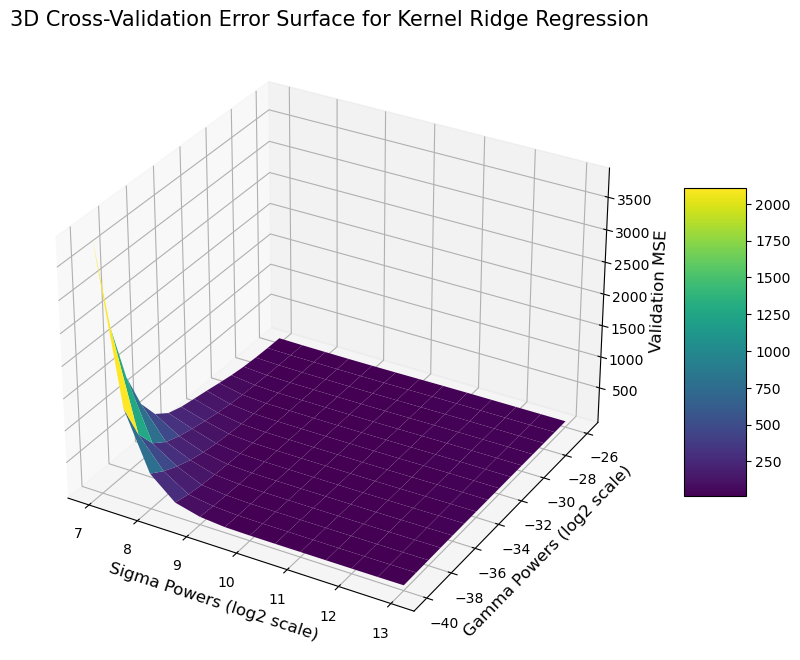

In [15]:
if __name__ == "__main__":
    analysis = BostonHousingAnalysis(filepath='boston_filtered.csv', target_column='MEDV', test_fraction=1/3, runs=20, K=5)
    analysis.run_analysis()
    analysis.plot_cross_validation_error()

# Part II

## 2.1 k-Nearest Neighbours

### 2.1.1 Generating the data

In [16]:
def distance(x, y, data, labels):
    """
    This function computes the distance between one new datapoint and all the training datapoints
    
    Inputs :
    x : float between 0 and 1, corresponds to the x axis of the point we are classifying
    y : float between 0 and 1, corresponds to the y axis of the point we are classifying
    data : (100,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (100,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    distances : (100,2) array. The first column corresponds to the distance between our datapoint and each of the training samples, the second column corresponds to the label of each of the training sample
    """
    distances = []
    for k in range(len(data)):
        distances.append([np.sqrt((x - data[k][0])**2 + (y - data[k][1])**2), labels[k]])
    return distances

def decision_function(x, y, k, data, labels):
    """
    This function performs the k-nn algorithm 

    Inputs :
    x : float between 0 and 1, corresponds to the x axis of the point we are classifying
    y : float between 0 and 1, corresponds to the y axis of the point we are classifying
    k : integer, corresponds to the number of closest neighbors we are looking at
    data : (100,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (100,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    round(label_sum / k) : Either 0 or 1, corresponds to the label of the datapoint we are evaluating
    """
    distances = distance(x, y, data, labels)
    distances.sort(key=lambda x: x[0])
    label_sum = sum([dist[1] for dist in distances[:k]])
    return round(label_sum / k)

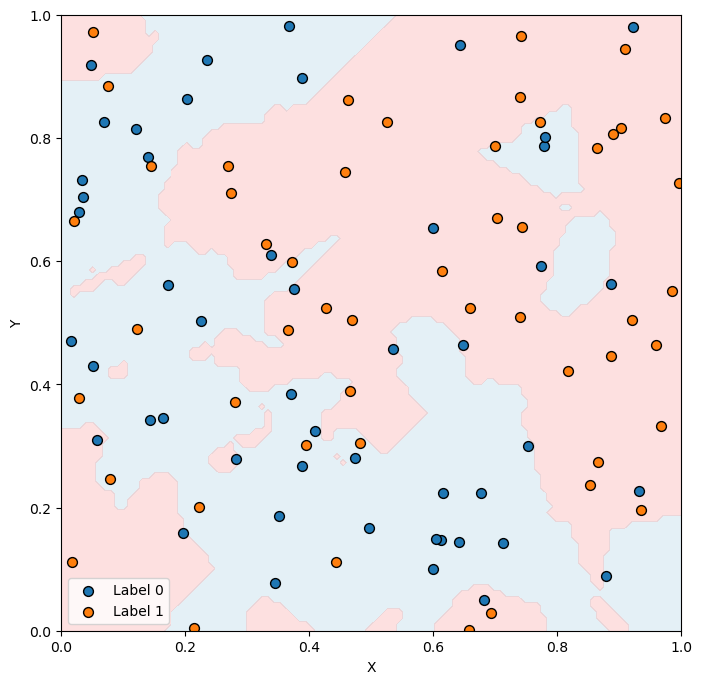

In [17]:
# We generate our datapoints
centers = np.random.uniform(0, 1, (100, 2))
labels = np.random.randint(0, 2, 100)

# We define the points on which we will evaluate our decson function
resolution = 100  
x = np.linspace(0, 1, resolution)
y = np.linspace(0, 1, resolution)
X, Y = np.meshgrid(x, y)

# We evaluate our fonction on those points
Z = np.array([[decision_function(x, y, 3, centers, labels) for x in x] for y in y])

# We draw our spaces
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=[-0.5, 0.5, 1.5], colors=["#A6CEE3", "#FB9A99"], alpha=0.3)

# We plot our labeled data
for label in [0, 1]:
    subset = centers[labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], label=f"Label {label}", s=50, edgecolor="k")


# We plot the entire graph
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### 2.1.2 Estimated generalization error of k-NN as a function of k

In [18]:
def distance(X, Y, data, labels):
    """
    This function computes the distance between a vector of new datapoints and all the training datapoints
    
    Inputs :
    X : (d,) array of floats in [0, 1], corresponds to the x axis of the d point we are classifying
    Y : (d,) array of floats in [0, 1], corresponds to the y axis of the d point we are classifying
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    distances : (2,d,s) list, containing the distances between our d datapoints and our training dataset
    """    
    distances = [np.sqrt((X.reshape(-1,1) - data[:,0])**2 + (Y.reshape(-1,1) - data[:,1])**2), np.tile(labels, reps=(X.shape[0], 1))]
    return distances

def decision_function(X, Y, k, data, labels):
    """
    This function performs the k-nn algorithm 

    Inputs :
    X : (d,) vector of floats between 0 and 1, corresponds to the x axis of the point we are classifying
    Y : (d,) vector of floats between 0 and 1, corresponds to the y axis of the point we are classifying
    k : integer, corresponds to the number of closest neighbors we are looking at
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    round(label_sum / k) : (d,) array composed of 0 or 1, corresponds to the label of the datapoints we are evaluating
    """
    distances = distance(X, Y, data, labels)
    values=distances[0]
    labels_=distances[1]
    smallest_elements_labels = [labels_[i][np.argpartition(values[i], k)[:k]]for i in range(len(values))]
    label_sum = (np.sum(smallest_elements_labels, axis=1))/k
    return np.round(label_sum)


def noisy_sampler(data, labels, datapoints=100, k=3):
    """
    This function performs the noisy sampled described in question 7 of the CW 

    Inputs :
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data
    datapoints : 
    k : integer, corresponds to the number of closest neighbors we are looking at


    Outputs : 
    [centers_noisy,labels_noisy] : 2 dimenisonal list, containing first the x and y of our generated points, and second the associated labels
    """
    centers_noisy = np.random.uniform(0, 1, (datapoints, 2)) # We generate our centers uniformely
    labels_noisy=decision_function(centers_noisy[:,0], centers_noisy[:,1], k, data, labels) # We compute the labels of those centers using our decsion function
    random_probabilities = np.random.rand(labels_noisy.size) # We assign to each center a random number between 0 and 1, uniformly
    # If the random number associated to the center is below 0.2, we replace its label by a random number in {0, 1}
    replace_probability = 0.2
    labels_noisy[random_probabilities < replace_probability] = np.random.randint(0, 2, size=np.sum(random_probabilities < replace_probability))
    return([centers_noisy,labels_noisy])

In [19]:
# We perform here protocol A
errors=[]
for k in range (1, 50):
    # print(k)
    error=0
    # Do 100 runs ...
    for _ in range (100):
        # Sample a h from pH
        centers = np.random.uniform(0, 1, (100, 2))
        labels = np.random.randint(0, 2, 100)

        # Build a k- NN model with 4000 training points sampled from ph(x, y)
        noisy_data_train=noisy_sampler(centers, labels, datapoints=4000, k=3)

        # Run k- NN estimate generalisation error ( for this run ) using 1000 test points sampled from ph(x, y) and compute the generalization error
        noisy_data_test=noisy_sampler(centers, labels, datapoints=1000, k=3)
        error += np.mean(np.abs(noisy_data_test[1] - decision_function(noisy_data_test[0][:,0], noisy_data_test[0][:,1], k, noisy_data_train[0], noisy_data_train[1])))
    errors.append(error/100)

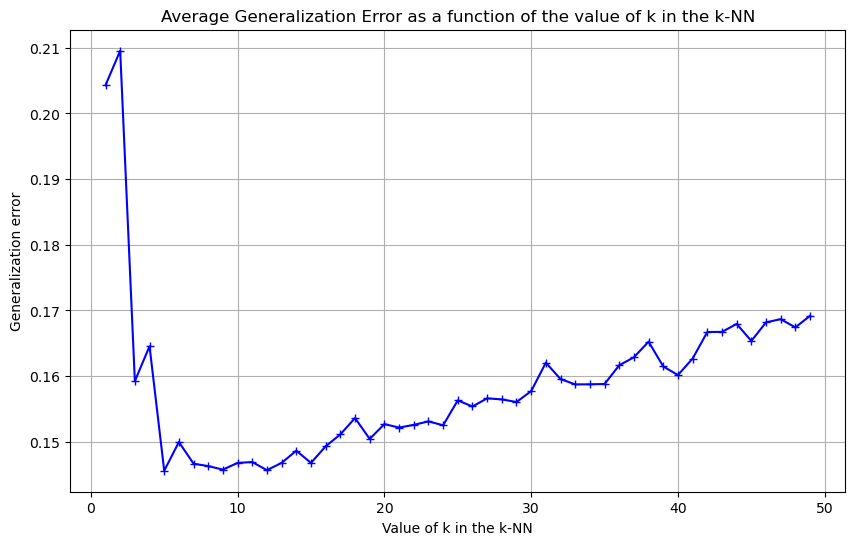

In [20]:
# We plot here our results

ks = [i for i in range(1,50)]
plt.figure(figsize=(10, 6))
plt.plot(ks, errors, marker='+', linestyle='-', color='b')
plt.xlabel('Value of k in the k-NN')
plt.ylabel('Generalization error')
plt.title('Average Generalization Error as a function of the value of k in the k-NN')
plt.grid(True)
plt.show()

### 2.1.3 Determine the optimal k as a function of the number of training points (m)

In [21]:
def distance(X, Y, data, labels):
    """
    This function computes the distance between a vector of new datapoints and all the training datapoints
    
    Inputs :
    X : (d,) array of floats in [0, 1], corresponds to the x axis of the d point we are classifying
    Y : (d,) array of floats in [0, 1], corresponds to the y axis of the d point we are classifying
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    distances : (2,d,s) list, containing the distances between our d datapoints and our training dataset
    """   
    distances = [np.sqrt((X.reshape(-1,1) - data[:,0])**2 + (Y.reshape(-1,1) - data[:,1])**2), np.tile(labels, reps=(X.shape[0], 1))]
    return distances

def decision_function(X, Y, k, data, labels):
    """
    This function performs the k-nn algorithm 

    Inputs :
    X : (d,) vector of floats between 0 and 1, corresponds to the x axis of the point we are classifying
    Y : (d,) vector of floats between 0 and 1, corresponds to the y axis of the point we are classifying
    k : integer, corresponds to the number of closest neighbors we are looking at
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data

    Outputs : 
    round(label_sum / k) : (d,) array composed of 0 or 1, corresponds to the label of the datapoints we are evaluating
    """
    distances = distance(X, Y, data, labels)
    values=distances[0]
    labels_=distances[1]
    smallest_elements_labels = [labels_[i][np.argpartition(values[i], k)[:k]]for i in range(len(values))]
    label_sum = (np.sum(smallest_elements_labels, axis=1))/k
    return np.round(label_sum)


def noisy_sampler(data, labels, datapoints=100, k=3):
    """
    This function performs the noisy sampled described in question 7 of the CW 

    Inputs :
    data : (s,2) array of floats between 0 and 1, corresponds to the coordonates of our trainig data
    labels : (s,) array of integers in {0, 1}, corresponds to the labels of our trainig data
    datapoints : 
    k : integer, corresponds to the number of closest neighbors we are looking at


    Outputs : 
    [centers_noisy,labels_noisy] : 2 dimenisonal list, containing first the x and y of our generated points, and second the associated labels
    """
    centers_noisy = np.random.uniform(0, 1, (datapoints, 2)) #We generate our centers uniformely
    labels_noisy=decision_function(centers_noisy[:,0], centers_noisy[:,1], k, data, labels)  #We compute the labels of those centers using our decsion function
    random_probabilities = np.random.rand(labels_noisy.size) # We assign to each center a random number between 0 and 1, uniformly
    #If the random number associated to the center is below 0.2, we replace its label by a random number in {0, 1}
    replace_probability = 0.2
    labels_noisy[random_probabilities < replace_probability] = np.random.randint(0, 2, size=np.sum(random_probabilities < replace_probability))
    return([centers_noisy,labels_noisy])

In [22]:
# We perform here protocol B

final_list=[]
for m in [100, 500, 1500, 2000, 2500, 3000, 3500, 4000] :
    # print(m) 
    k_list=[]
    # Do 100 runs ...
    for _ in range (100):
        error=2
        k_opt=1
        for k in range (1, 50):
            # Sample a h from pH
            centers = np.random.uniform(0, 1, (100, 2))
            labels = np.random.randint(0, 2, 100)

            # Build a k- NN model with m training points sampled from ph(x, y).
            noisy_data_train=noisy_sampler(centers, labels, datapoints=m, k=3)

            # Run k- NN estimate generalisation error ( for this run ) using 1000 test points sampled from ph(x, y), and store the error
            noisy_data_test=noisy_sampler(centers, labels, datapoints=1000, k=3)
            error_current = np.mean(np.abs(noisy_data_test[1] - decision_function(noisy_data_test[0][:,0], noisy_data_test[0][:,1], k, noisy_data_train[0], noisy_data_train[1])))
            
            # The estimated optimal k ( for this run ) is then the k with minimal estimated generalisation error .
            if error_current<error : 
                error=error_current
                k_opt=k
        k_list.append(k_opt)
    # The estimated optimal k (y- axis ) is then the mean of these 100 ‘‘ run ’ ’ optimal ‘k’s .
    final_list.append(np.round(np.mean(k_list)))

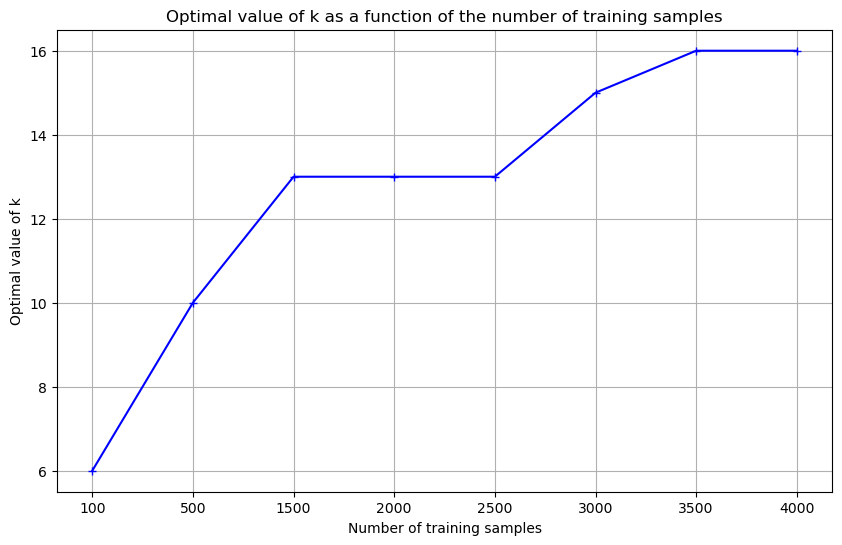

In [23]:
# We plot here the results

ks = [i for i in range(0,8)]
plt.figure(figsize=(10, 6))
plt.plot(ks, final_list, marker='+', linestyle='-', color='b')
plt.xlabel('Number of training samples')
plt.ylabel('Optimal value of k')
plt.title('Optimal value of k as a function of the number of training samples')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=[100, 500, 1500, 2000, 2500, 3000, 3500, 4000])
plt.grid(True)
plt.show()